<a href="https://colab.research.google.com/github/nayan1306/DeepLearning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist digit classification

In [72]:

!pip install gradio

In [73]:
import gradio as gr

In [74]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np

In [75]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [76]:
X_train.shape

(60000, 28, 28)

In [77]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [78]:
X_test.shape

(10000, 28, 28)

In [79]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

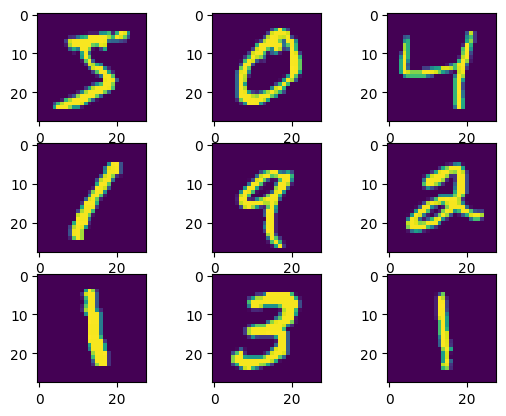

In [80]:
import matplotlib.pyplot as plt
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])

In [81]:
# Scaling the values to a range fo 0 to 1
# This helps to train the neural networks fast and also helps in fast convergence
X_train = X_train/255
X_test = X_test/255

In [82]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [83]:
model = Sequential()
#input layer
model.add(Flatten(input_shape=(28,28)))
#hidden layer 1
model.add(Dense(128,activation='relu'))
# hidden layer 2
model.add(Dense(32,activation='relu'))
# Output layer
model.add(Dense(10,activation='softmax'))


In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [86]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2844 - accuracy: 0.9184 - val_loss: 0.1503 - val_accuracy: 0.9558
Epoch 2/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1269 - accuracy: 0.9616 - val_loss: 0.1142 - val_accuracy: 0.9671
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0880 - accuracy: 0.9727 - val_loss: 0.1138 - val_accuracy: 0.9678
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.1041 - val_accuracy: 0.9690
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0523 - accuracy: 0.9828 - val_loss: 0.0970 - val_accuracy: 0.9730
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0968 - val_accuracy: 0.9737
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.1109 - val_accu

In [87]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [88]:
y_pred = y_prob.argmax(axis=1)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.976

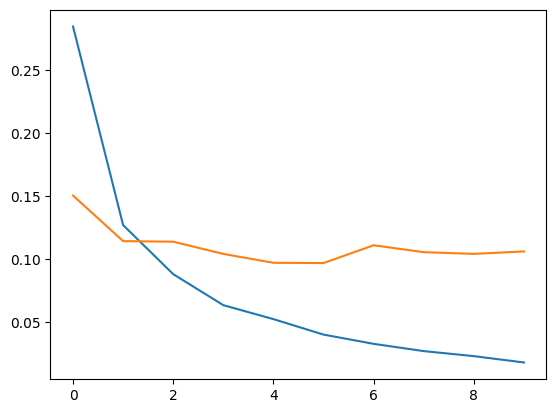

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

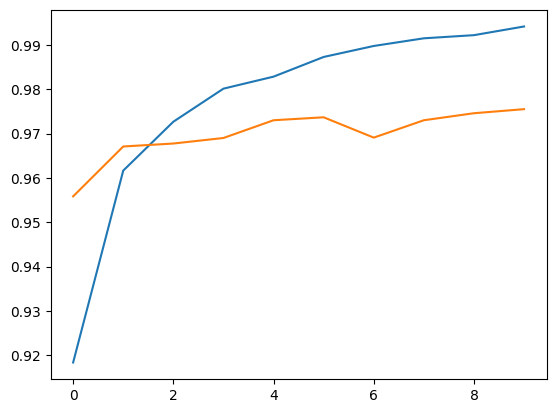

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

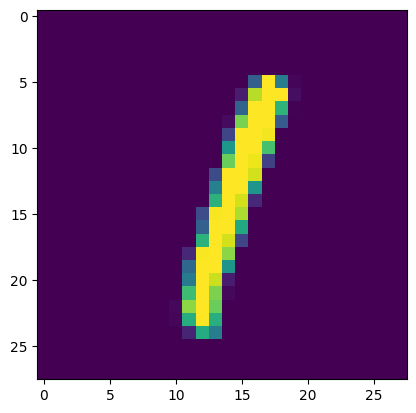

In [92]:
plt.imshow(X_test[5])

In [93]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 38ms/step


array([1])

In [102]:
# Gradio Function
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return int(pred)

In [103]:

iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

In [104]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 25ms/step
Keyboard interruption in main thread... closing server.
